# Assignment 1: Supervised Learning and kNN Algorithm


### Group Members:
- Muntasir Islam
- Md Maruf
- Firoz Chowdhury
- Sakshi Sakshi


# Part 1: Familiarization and Basic Testing of the kNN Algorithm

## 1.1 Dataset Selection
For this assignment, we selected the **Work Hours and Productivity Dataset**.
It contains information about employees work hours and their corresponding productivity levels.
This dataset is interesting because it can help analyze how working time affects performance — a common business challenge in HR analytics and operations management.

## 1.2 Load and Explore Dataset

In this section, we load the dataset WorkhoursProductivity.xlsx and explore its structure to understand the data before applying any machine learning algorithms.

- The dataset is loaded using the pandas library.

- We use `head()` to display the first few rows to get an overview of the columns and data types.

- The `info()` function provides information about column names, data types, and missing values.

- The `describe` function gives statistical summaries for the numeric columns.

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [29]:
# Load the dataset
df = pd.read_excel('WorkhoursProductivity.xlsx')


In [30]:
# Dataset Information and Summary
# Basic info
df.info()

# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee_ID              10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Department               10000 non-null  object 
 3   Job_Level                10000 non-null  object 
 4   Years_at_Company         10000 non-null  int64  
 5   Monthly_Hours_Worked     10000 non-null  int64  
 6   Remote_Work              10000 non-null  object 
 7   Meetings_per_Week        10000 non-null  int64  
 8   Tasks_Completed_Per_Day  10000 non-null  int64  
 9   Overtime_Hours_Per_Week  10000 non-null  int64  
 10  Work_Life_Balance        10000 non-null  object 
 11  Job_Satisfaction         10000 non-null  int64  
 12  Productivity_Score       10000 non-null  float64
 13  Annual_Salary            10000 non-null  int64  
 14  Absences_Per_Year      

,Employee_ID,Age,Years_at_Company,Monthly_Hours_Worked,Meetings_per_Week,Tasks_Completed_Per_Day,Overtime_Hours_Per_Week,Job_Satisfaction,Productivity_Score,Annual_Salary,Absences_Per_Year
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,40.655800,14.935600,169.513100,6.975200,10.98120,6.948000,4.991600,75.389223,117257.446300,9.49360
std,2886.89568,11.005101,8.359931,28.775487,4.295606,4.89633,4.330332,2.586232,14.450485,47410.812846,5.76471
min,1.00000,22.000000,1.000000,120.000000,0.000000,3.00000,0.000000,1.000000,50.000000,35001.000000,0.00000
25%,2500.75000,31.000000,8.000000,145.000000,3.000000,7.00000,3.000000,3.000000,62.855000,75761.750000,4.00000
50%,5000.50000,41.000000,15.000000,170.000000,7.000000,11.00000,7.000000,5.000000,75.535000,117645.000000,9.00000
75%,7500.25000,50.000000,22.000000,194.000000,11.000000,15.00000,11.000000,7.000000,88.032500,157836.750000,14.00000
max,10000.00000,59.000000,29.000000,219.000000,14.000000,19.00000,14.000000,9.000000,100.000000,199997.000000,19.00000


## 1.3 Data Preprocessing

Before applying the kNN algorithm, the dataset was preprocessed by first checking for any missing values using `df.isnull().sum()` to ensure data completeness and reliability. 
Since kNN is a distance-based algorithm that can be affected by different feature scales, normalization is performed using the StandardScaler from `sklearn.preprocessing`. The features **Monthly_Hours_Worked** and **Productivity_Score** were standardized so that each has a mean of **0** and a standard deviation of **1**, ensuring that all variables contribute equally to the distance calculation and improving the model’s overall performance.

In [31]:
# Check for missing values
df.isnull().sum()

# Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Monthly_Hours_Worked', 'Productivity_Score']])


## 1.4 Algorithm Application
We’ll apply the **k-Nearest Neighbors (kNN)** algorithm using `scikit-learn` to predict productivity class based on work hours.

### 1.4.1 Separating Features and Target Variable

In this step, the features **(independent variables)** are selected from the dataset to be used for training the kNN model. These features represent the input data that will help predict the target variable. The selected columns — **Monthly_Hours_Worked**, **Overtime_Hours_Per_Week**, **Tasks_Completed_Per_Day**, and **Job_Satisfaction** — are stored in the variable **X**.

In [32]:
## Separating Features and Target Variable

# Features (independent variables)
X = df[['Monthly_Hours_Worked', 'Overtime_Hours_Per_Week',
          'Tasks_Completed_Per_Day', 'Job_Satisfaction']]


### 1.4.2 Displaying the Feature Data

To verify that the feature data has been correctly selected, the first few rows of the feature set **X** are displayed using the `head()` function. This helps confirm that the right columns have been included and that the data looks as expected.

In [33]:
# Displaying the Feature data
X.head()

,Monthly_Hours_Worked,Overtime_Hours_Per_Week,Tasks_Completed_Per_Day,Job_Satisfaction
0,198,1,7,5
1,157,10,3,1
2,146,11,15,4
3,200,0,9,5
4,193,6,9,7


### 1.4.3 Converting Productivity Score into Categorical Levels

In this step, the continuous **Productivity_Score** values are converted into categorical levels to prepare the data for classification.
First, any spaces are removed, and the column is converted to numeric format using `pd.to_numeric()` to handle potential data inconsistencies.
Then, the `pd.cut()` function is used to divide the productivity scores into three categories — **Low**, **Medium**, and **High** — based on defined numerical ranges.
Finally, the first 10 rows are printed to verify that the conversion was successful.

In [34]:
## Converting Productivity Score into Categorical Levels

# Remove spaces and ensure numeric conversion
df['Productivity_Score'] = pd.to_numeric(df['Productivity_Score'], errors='coerce')

# Create bins and labels for categorical classification
df['Productivity_Level'] = pd.cut(
    df['Productivity_Score'],
    bins=[0, 50, 75, 100],             
    labels=['Low', 'Medium', 'High'],  
    include_lowest=True
)

# Verify the conversion
print(df[['Productivity_Score', 'Productivity_Level']].head(10))


   Productivity_Score Productivity_Level
0               88.73               High
1               74.70             Medium
2               67.85             Medium
3               93.73               High
4               93.30               High
5               96.30               High
6               78.70               High
7               83.78               High
8               71.47             Medium
9               95.04               High


### 1.4.4 Target (Dependent Variable)

In this step, the target variable is defined for the **kNN classification model**.
The target variable **y** represents the **Productivity_Level** column, which contains the categorical values — **Low, Medium, and High** — derived from the continuous productivity scores.
This variable will be used by the model to learn and predict employee productivity categories based on the selected features.

In [35]:
# Target (dependent variable)

y = df['Productivity_Level']

### 1.4.5 Displaying Target Variable

To verify that the target variable **y** has been correctly extracted and contains the expected categorical values **(Low, Medium, High)**, we display the first few rows using the `head()` function. This helps ensure that the data is properly formatted before proceeding with model training.

In [36]:
# Displaying the Target Data
y.head()

0      High
1    Medium
2    Medium
3      High
4      High
Name: Productivity_Level, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

### 1.4.6 Splitting the Dataset into Training and Testing Sets

To evaluate the model’s performance effectively, the dataset is divided into two parts: a training set (80%) used to train the model, and a testing set (20%) used to assess how well the model generalizes to unseen data. The `train_test_split()` function from `sklearn.model_selection` is used for this purpose. Setting `random_state=42` ensures reproducibility of results.

In [37]:
## Splitting the Dataset into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 1.4.7 Viewing the Test Feature Data (X_test)

After splitting the dataset, the test feature data **(X_test)** contains **20%** of the total samples. This subset is used to evaluate how well the trained model performs on unseen data. Displaying ****X_test** helps verify that the split was successful and that the feature columns were correctly separated.

In [38]:
# View Test Feature Data
X_test

,Monthly_Hours_Worked,Overtime_Hours_Per_Week,Tasks_Completed_Per_Day,Job_Satisfaction
6252,209,2,14,9
4684,212,3,9,3
1731,196,3,15,3
4742,163,11,19,8
4521,121,2,4,8
...,...,...,...,...
6412,169,7,8,5
8285,151,13,11,5
7853,198,8,5,2
1095,149,0,14,2


### 1.4.8 Viewing the Test Target Data (y_test)

The test target data **(y_test)** represents the actual category labels **(Productivity Levels)** corresponding to the test feature set **(X_test)**.
By viewing **y_test**, we can confirm that the target values have been correctly separated and are ready to be used for model evaluation.

In [39]:
# View Test Target Data
y_test

6252    Medium
4684    Medium
1731      High
4742    Medium
4521      High
         ...  
6412      High
8285    Medium
7853      High
1095      High
6929      High
Name: Productivity_Level, Length: 2000, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

### 1.4.9 Defining Features and Target Variable

In this step, we define the features and the target variable for our **kNN** model.

- Features (X): These are the independent variables that the model will use to learn patterns — here, we include **Monthly_Hours_Worked**, **Overtime_Hours_Per_Week**, **Tasks_Completed_Per_Day**, and **Job_Satisfaction**.

- Target (y): This is the dependent variable that the model aims to predict — in this case, the **Productivity_Level (categorized as Low, Medium, or High)**.

In [40]:
# Defining Features & Target Variables
X = df[['Monthly_Hours_Worked', 'Overtime_Hours_Per_Week',
          'Tasks_Completed_Per_Day', 'Job_Satisfaction']]
y = df['Productivity_Level']


### 1.4.10 Training the kNN Model and Making Predictions

In this step, we train the **K-Nearest Neighbors (kNN)** model and generate predictions.

- We set the number of neighbors (k) to 3, meaning the algorithm will consider the 3 nearest data points to classify a test sample.

- The model is trained using the training data (X_train, y_train).

- Once trained, the model predicts the productivity levels for the test data (X_test).

- Finally, we display the first 20 predicted values to verify the output.

In [41]:
# Training KNN 
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_sklearn = knn.predict(X_test)
print(y_pred_sklearn[:20])


['High' 'High' 'Medium' 'Medium' 'High' 'High' 'High' 'High' 'Medium'
 'Medium' 'High' 'High' 'High' 'Medium' 'Medium' 'High' 'High' 'High'
 'High' 'High']


### 1.4.11 Evaluating Model Accuracy

After making predictions with the **kNN** model, we evaluate its performance using the accuracy score.
The accuracy score measures how often the model’s predictions match the actual labels in the test set.
A higher score **(closer to 1.0)** indicates better model performance, while a lower score suggests the model may need further tuning or feature adjustments.

In [42]:
# Testing Accuracy
accuracy_score(y_test, y_pred_sklearn)

0.5

#### Observation on the Result of Accuracy

After converting the continuous `Productivity_Score` into categorical classes (e.g., Low, Medium, High), 
the **kNN** model achieved an accuracy of approximately **0.5**.

This relatively low accuracy indicates that:
- The chosen features (such as **Monthly_Hours_Worked**, **Overtime_Hours_Per_Week**, **Tasks_Completed_Per_Day**, and **Job_Satisfaction**) may not strongly predict productivity.
- The target variable was originally continuous, so some overlap exists between categories.
- The dataset might not have clear boundaries that kNN can separate using Euclidean distance.

However, this result still demonstrates the practical application of the kNN algorithm.
It shows how the performance can vary depending on the dataset characteristics and variable relationships.


## 1.5 Use Case Identification
Two real-world applications of kNN algorithm:
- **Customer Segmentation:** Classifying customers into groups (e.g., high-value vs. low-value) based on purchasing habits.

- **Credit Risk Assessment:** Predicting whether a loan applicant is low or high risk by comparing with similar applicants’ profiles.

# Part 2: In-Depth Experimentation with the kNN Algorithm

## 2.1 Parameter Experimentation
In the k-Nearest Neighbors (k-NN) algorithm, the value of k determines how many nearest neighbors are considered when making a prediction. Testing multiple k values helps find the optimal number that gives the best model performance, and using odd numbers is preferred to avoid ties during majority voting.So,In this step we give the odd numbers to find out the nearest neighbours.


In [43]:
# List of k values to test
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

We create an empty list to store the accuracy results of the model for different parameter values. This allows us to keep track of the performance of each experiment and later analyze or visualize which parameters give the best results.

In [44]:
# Empty list to store results
accuracies = []

### 2.1.1 Evaluating k-NN for Different k Values

In this step,we evaluate the performance of a k-Nearest Neighbors (k-NN) classifier for multiple **k** values. It loops through each value in `k_values`, trains the model on the training data (`X_train`, `y_train`), predicts labels for the test set (`X_test`), calculates the accuracy using `accuracy_score`, and stores the results in the `accuracies` list. The code also prints a simple table showing each **k** value alongside its corresponding accuracy, which helps identify the best **k** for the dataset.


In [45]:
print("k Value \tAccuracy")
print("----------------------")

# Loop through each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"{k}\t\t{acc:.4f}")

k Value 	Accuracy
----------------------
1		0.5030
3		0.5000
5		0.5060
7		0.4995
9		0.5090
11		0.5115
13		0.5100
15		0.5220
17		0.5085
19		0.5135


## 2.2 Train-Test Split Analysis 

### Different Test Sizes to Compare

We define a list of different test set proportions to evaluate how changing the size of the test set affects the model's performance. These values represent the fraction of the dataset that will be used for testing.


In [46]:
# Different test sizes to compare
test_sizes = [0.1, 0.2, 0.3, 0.4]

### Evaluating k-NN Accuracy for Different Train/Test Splits

Then we tests how the size of the training and testing sets affects the performance of a k-Nearest Neighbors (k-NN) classifier. It loops through each value in `test_sizes`, splits the dataset accordingly using `train_test_split` with a fixed `random_state` for reproducibility, and trains a k-NN model with `k=3` on the training set. The model then predicts labels for the test set, and the accuracy is calculated using `accuracy_score`. Finally, it prints a table showing the percentage of data used for training and testing alongside the corresponding accuracy. This helps to understand the impact of different train/test splits on model performance.

In [47]:
# Loop through each test size
print("Train/Test Split\tAccuracy")
for test_size in test_sizes:
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    k=3
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)             # Train the model
    y_pred_sklearn = knn.predict(X_test)

    # accuracy
    acc = accuracy_score(y_test, y_pred_sklearn)

    # print the result 
    train_percent = int((1 - test_size) * 100)
    test_percent = int(test_size * 100)
    print(f"{train_percent}/{test_percent}\t\t\t{acc:.4f}")

Train/Test Split	Accuracy
90/10			0.5020
80/20			0.5000
70/30			0.4973
60/40			0.5000


## 2.3 K-Fold Cross-Validation with the WorkhoursProductivity Dataset

In this step, we will demonstrate **K-fold cross-validation** on the **WorkhoursProductivity** dataset using `scikit-learn`. K-fold cross-validation is a widely used method to assess a machine learning model's performance by repeatedly dividing the data into training and testing sets. This technique provides a more robust estimate of the model's accuracy, minimizes bias compared to a single train/test split, and helps evaluate how well the model can generalize to new, unseen data.



### 2.3.1 Import Libraries

We need `pandas` for data handling, `numpy` for numerical operations, `KNeighborsClassifier` for modeling, and `KFold` & `cross_val_score` for k-fold evaluation & `matplotlib` for visualization.


In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


### 2.3.2 Define the Features & Target for k-Fold Cross Validation

We'll use the **WorkhoursProductivity** dataset, which contains records of employees' work hours and their corresponding productivity Scores. Each sample includes the features **'Monthly_Hours_Worked', 'Overtime_Hours_Per_Week','Tasks_Completed_Per_Day', 'Job_Satisfaction'** representing the number of hours worked, and the target variable `Productivity_Level`, which indicates the productivity level of the employee. This dataset will help us explore how work hours relate to productivity and evaluate a machine learning model using k-fold cross-validation.


In [49]:
# Features
X = df[['Monthly_Hours_Worked', 'Overtime_Hours_Per_Week',
        'Tasks_Completed_Per_Day', 'Job_Satisfaction']]

# Target
y = df['Productivity_Level']


### 2.3.3 Define k-Fold Cross-Validation
We will use 5 folds and shuffle the data to ensure randomness.

This means the data will be split into 5 subsets, and the model will be trained on 4 folds and evaluated on the remaining 1 fold, repeating this process 5 times.

- `n_splits=5` specifies the number of folds.
- `shuffle=True` shuffles the data before splitting to ensure each fold is representative of the overall dataset.

In [50]:
# Define the number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)


### 2.3.4 Initialize k-NN and Evaluate with Cross-Validation
We will use k=3 neighbors and calculate the accuracy for each fold using `cross_val_score`.

In [51]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Perform k-fold cross-validation
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

# Display results
print(f"Accuracy for each fold:{scores}")
print("Average Accuracy across all folds:", scores.mean())



Accuracy for each fold:[0.496  0.504  0.5095 0.4815 0.5135]
Average Accuracy across all folds: 0.5009


### 2.3.5 Analyzing the Results
Visualizing the accuracy for each fold helps us understand the variability of the model's performance across different splits.

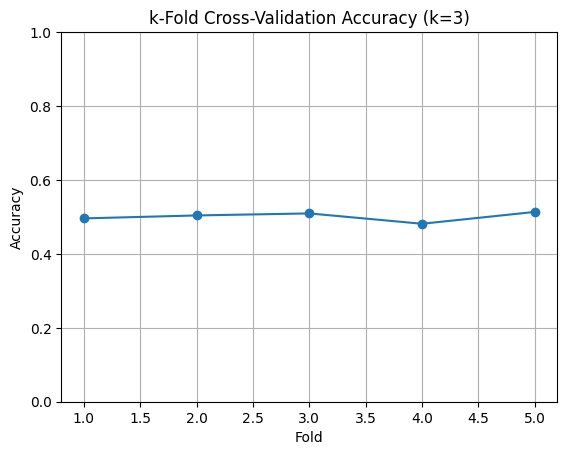

In [52]:
plt.plot(range(1, len(scores)+1), scores, marker='o')
plt.title('k-Fold Cross-Validation Accuracy (k=3)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


## Observation

From the k-Fold Cross Validation we observe the following:

- The scores array shows the accuracy for each fold of k-fold cross-validation.

- The mean accuracy provides an overall estimate of model performance.

- Using k-fold cross-validation helps assess model stability and generalization, making it more reliable than a single train/test split.